## Homework

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset

In [1]:
# Importing the necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This line makes the plots work in notebooks
%matplotlib inline

# For changing the representation of Numpy scalars. 
# Otherwise, Numpy will show 'np.float64(3.0)' instead of '3.0'
np.set_printoptions(legacy="1.25")

In [34]:
# Creating a DataFrame from the dataset
df = pd.read_csv('./data/laptops.csv')

In [35]:
# Checking the df
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


First, we'll normalize the names of the columns:

In [36]:
# Normalizing the columns names
df2 = df.copy()
df2.columns = df.columns.str.lower().str.replace(' ', '_')
df2.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01



Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [37]:
# Selecting the columns 'ram', 'storage', 'screen' and 'final_price'
df2 = df2[['ram', 'storage', 'screen', 'final_price']]
df2.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

<Axes: xlabel='final_price', ylabel='Count'>

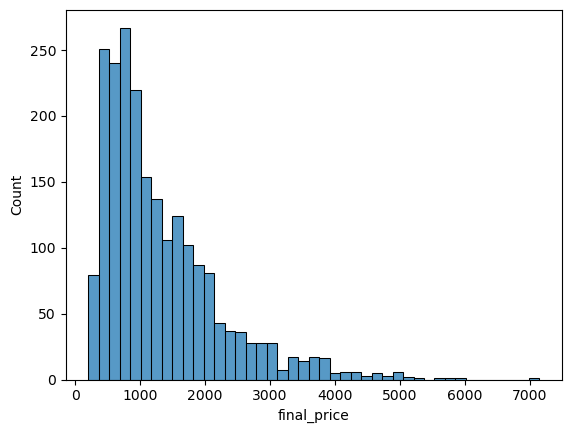

In [38]:
# Creating a histogram for the 'final_price' column
sns.histplot(df2.final_price)

Doing a histogram of the `final_price` variable, we can see that it has a long tail.


### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [39]:

# Getting the number of missing values per column
df2.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Answer: The column with missing values is the column `'screen'`, with 4 missing values.

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [8]:
# Getting the median of the column 'ram'
df2.ram.median()

16.0

Answer: The median for the variable `'ram'` is 16.

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [9]:
# Obtaining the number of rows for the validation, test and train sets.
n = len(df2)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(432, 432, 1296)

In [10]:
# Generating the indexes needed for shuffling the dataset
idx = np.arange(n)

# Setting the seed for the generator
np.random.seed(42)

# Shuffling the indexes
np.random.shuffle(idx)

In [11]:
# Spliting the data in train, validation and test sets
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train+n_val]]
df2_test = df2.iloc[idx[n_train+n_val:]]

In [12]:
# Resetting the indexes of the datasets
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

In [13]:
# Obtaining the target variables
y_train = df2_train.final_price.values
y_val = df2_val.final_price.values
y_test = df2_test.final_price.values

In [14]:
# Deleting the target variables from the datasets
del df2_train['final_price']
del df2_val['final_price']
del df2_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [15]:
# Function to fill the missing values
def prepare_X(df, fillna_value):
    df_aux = df
    df_aux = df_aux.fillna(fillna_value)
    return df_aux.values

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

In [47]:
# Function to calculate the RMSE 
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Model with the mean as the replacing value

In [18]:
# Obtaining the columns with missing values
df2_train.isna().any()

ram        False
storage    False
screen      True
dtype: bool

In [19]:
# Calculating the mean of the 'screen' variable
screen_mean = df2_train.screen.mean()

# Filling the missing values with the mean and training the model
X_mean_train = prepare_X(df2_train, fillna_value = screen_mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [20]:
# Filling the missing values
X_mean_val = prepare_X(df2_val, fillna_value = screen_mean)

# Calculating the 'y' predicted values
y_mean_pred_val = w_0_mean + X_mean_val @ w_mean

In [21]:
# Calculating the RMSE
np.round(rmse(y_val, y_mean_pred_val), 2)

600.27

The RMSE of the model when we replaced the missing values with the mean is 600.27

#### Model with '0' as the replacing value

In [22]:
# Filling the missing values with '0' and training the model
X_null_train = prepare_X(df2_train, fillna_value = 0)

w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [23]:
# Filling the missing values
X_null_val = prepare_X(df2_val, fillna_value = 0)

# Calculating the 'y' predicted values
y_null_pred_val = w_0_null + X_null_val @ w_null

In [24]:
# Calculating the RMSE
np.round(rmse(y_val, y_null_pred_val), 2)

597.36

Answer: Filling the missing values with 0 gives a better RMSE. But, given how similar the values are, one could also say that both are equally good.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [25]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

In [26]:
# Training different models with different r values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_values = []

for r in r_values:
    # Using the X_null_train variable from before
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r)

    y_null_pred_val = w_0 + X_null_val @ w

    rmse_values.append(np.round(rmse(y_val, y_null_pred_val), 2))

In [32]:
for i in range(len(r_values)):
    print(f'r: {r_values[i]}\t RMSE: {rmse_values[i]}')

r: 0	 RMSE: 597.36
r: 0.01	 RMSE: 597.36
r: 0.1	 RMSE: 597.35
r: 1	 RMSE: 597.21
r: 5	 RMSE: 597.01
r: 10	 RMSE: 597.06
r: 100	 RMSE: 597.9


Answer: r = 5 gives the best RMSE value. But, since there's no option for r = 5, then r = 10 gives the best RMSE value.

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [40]:
n = len(df2)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [50]:
# Seeds to use
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values = []

for seed in seeds:
    # Generating the indexes needed for shuffling the dataset
    idx = np.arange(n)

    # Setting the seed for the generator
    np.random.seed(seed)

    # Shuffling the indexes
    np.random.shuffle(idx)

    # Spliting the data in train, validation and test sets
    df2_train = df2.iloc[idx[:n_train]].copy()
    df2_val = df2.iloc[idx[n_train:n_train+n_val]].copy()
    df2_test = df2.iloc[idx[n_train+n_val:]].copy()

    # Resetting the indexes of the datasets
    df2_train = df2_train.reset_index(drop=True)
    df2_val = df2_val.reset_index(drop=True)
    df2_test = df2_test.reset_index(drop=True)

    # Obtaining the target variables
    y_train = df2_train.final_price.values
    y_val = df2_val.final_price.values
    y_test = df2_test.final_price.values

    # Deleting the target variables from the datasets
    del df2_train['final_price']
    del df2_val['final_price']
    del df2_test['final_price']

    # Filling the missing values and training the model
    X_train = prepare_X(df2_train, fillna_value = 0)
    w_0, w = train_linear_regression(X_train, y_train)

    # Filling the missing values
    X_val = prepare_X(df2_val, fillna_value = 0)

    # Calculating the 'y' predicted values
    y_pred_val = w_0 + X_val @ w

    # Calculating and storing the RMSE values
    rmse_values.append(np.round(rmse(y_val, y_pred_val), 2))

In [52]:
# Printing the seeds and the RMSE value associated with it
for i in range(len(seeds)):
    print(f'seed: {seeds[i]}\tRMSE: {rmse_values[i]}')

seed: 0	RMSE: 565.45
seed: 1	RMSE: 636.8
seed: 2	RMSE: 588.96
seed: 3	RMSE: 597.81
seed: 4	RMSE: 571.96
seed: 5	RMSE: 573.24
seed: 6	RMSE: 647.34
seed: 7	RMSE: 550.44
seed: 8	RMSE: 587.33
seed: 9	RMSE: 576.1


In [54]:
# Calculating and rounding the std
std = np.std(rmse_values)
round(std, 3)

29.176

Answer: The value of the std is 29.176

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [74]:
# Obtaining the number of rows for the train, validation and test sets.
n = len(df2)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Generating the indexes needed for shuffling the dataset
idx = np.arange(n)

# Setting the seed for the generator
np.random.seed(9)

# Shuffling the indexes
np.random.shuffle(idx)

# Spliting the data in train, validation and test sets
df2_train = df2.iloc[idx[:n_train]].copy()
df2_val = df2.iloc[idx[n_train:n_train+n_val]].copy()
df2_test = df2.iloc[idx[n_train+n_val:]].copy()

# Combining the train and validation datasets
df_full_train = pd.concat([df2_train, df2_val])

# Resetting the indexes of the datasets
df_full_train = df_full_train.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

# Obtaining the target variables
y_full_train = df_full_train.final_price.values
y_test = df2_test.final_price.values

# Deleting the target variables from the datasets
del df_full_train['final_price']
del df2_test['final_price']

# Filling the missing values and training the model
X_full_train = prepare_X(df_full_train, fillna_value = 0)
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Filling the missing values
X_test = prepare_X(df2_test, fillna_value = 0)

# Calculating the 'y' predicted values
y_pred = w_0 + X_test @ w

# Calculating and printing the RMSE value
np.round(rmse(y_test, y_pred), 2)

608.61

Answer: The RMSE value on the test dataset is 608.61.